In [ ]:
#%config Completer.use_jedi = False

# **Chapter 4**
## *Persisting Time Series Data to Files*, 

This chapter covers different options and use cases to store time series data for later retrieval. The techniques will cover various methods and file types, whether on-premises or in the cloud. In addition, this chapter covers serialization, compression, overwriting, or appending to files. 

We will cover the following recipes on how to ingest data into a pandas DataFrame:
* Time series data serialization with pickle
* Writing to CSV and other delimited files
* Writing data to an Excel file
* Storing data to a private S3 bucket

# Recipe 1: Serializing time series data with pickle
* This recipe explains the concept of data serialization 
* Demonstrate how pickling works 

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
pd.__version__

'2.3.3'

In [3]:
file = \
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')
df = pd.read_csv(file)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [5]:
# filter data where Country is United States
df_usa = df[df['Country/Region'] == 'US']
# filter columns from June to end of September
df_usa_summer = df_usa.loc[:, '6/1/21':'9/30/21']
# pivot the data 
df_usa_summer

,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,...,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21
260,33407540,33424131,33442100,33459613,33474770,33480666,33494852,33507651,33525852,33540369,...,42487611,42619242,42748318,42922887,42984802,43040459,43194360,43307569,43429449,43539596


In [6]:
# unpivot using pd.melt()
df_usa_summer_unpivoted = \
    pd.melt(df_usa_summer,
            value_vars=df_usa_summer.columns,
            value_name='cases',
            var_name='date').set_index('date')


df_usa_summer_unpivoted.index = \
    pd.to_datetime(df_usa_summer_unpivoted.index, format="%m/%d/%y")

df_usa_summer_unpivoted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2021-06-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [7]:
print(df_usa_summer_unpivoted.head())

               cases
date                
2021-06-01  33407540
2021-06-02  33424131
2021-06-03  33442100
2021-06-04  33459613
2021-06-05  33474770


In [8]:
output =\
Path('../../datasets/Ch4/covid_usa_summer_2021.pkl')

df_usa_summer_unpivoted.to_pickle(output)

In [9]:
unpickled_df = pd.read_pickle(output)
unpickled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2021-06-01 to 2021-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


## Writing a Pickle file using the Pickle library

In [10]:
import pickle

In [11]:
file_path = \
Path('../../datasets/Ch4/covid_usa_summer_2021_v2.pkl')

with open(file_path, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted, file)

In [12]:
with open(file_path, "rb") as file:
    df = pickle.load(file)
type(df)

pandas.core.frame.DataFrame

In [13]:
with open(output, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted, file)

In [14]:
with open(output, "rb") as file:
    df = pickle.load(file)

In [15]:
zip_output =\
Path('../../datasets/Ch4/covid_usa_summer_2021.zip')

# write the Dataframe
df_usa_summer_unpivoted.to_pickle(zip_output)

In [16]:
# Read the DataFrame
pd.read_pickle(zip_output)

,cases
date,
2021-06-01,33407540
2021-06-02,33424131
2021-06-03,33442100
2021-06-04,33459613
2021-06-05,33474770
...,...
2021-09-26,43040459
2021-09-27,43194360
2021-09-28,43307569


#### Check seriealization protocols

In [17]:
pickle.HIGHEST_PROTOCOL

5

In [18]:
output

PosixPath('../../datasets/Ch4/covid_usa_summer_2021.pkl')

In [19]:
with open(file_path, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted,
                file,
                pickle.HIGHEST_PROTOCOL)

# this is equivalent to the following
with open(file_path, "wb") as file:
    pickle.dump(df_usa_summer_unpivoted,
                file,
                5)

## There is more

In [20]:
def covid_by_country(file, days, country):
    ts = pd.read_csv(file)
    ts = ts[ts['Country/Region'] == country]
    final = ts.iloc[:, -days:].sum()
    final.index = pd.to_datetime(final.index, 
                                format="%m/%d/%y")
    return final

In [21]:
file = \
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')

us_past_120_days = covid_by_country(file, 120, 'US')
us_past_120_days

2022-11-10     97973552
2022-11-11     97986735
2022-11-12     97992007
2022-11-13     97994653
2022-11-14     98045066
                ...    
2023-03-05    103646975
2023-03-06    103655539
2023-03-07    103690910
2023-03-08    103755771
2023-03-09    103802702
Length: 120, dtype: int64

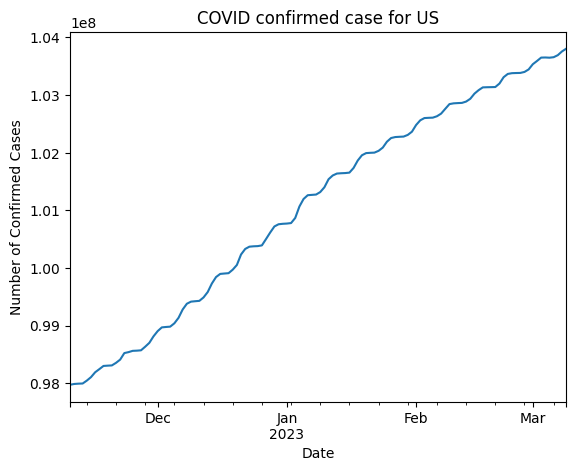

In [24]:
plot_example = \
us_past_120_days.plot(title=f'COVID confirmed case for US',
                xlabel='Date',
                ylabel='Number of Confirmed Cases');

In [25]:
fig = plot_example.get_figure()

In [26]:
from datetime import datetime

metadata = {
    'date': datetime.now(),
    'data': '''
        COVID-19 Data Repository by the 
        Center for Systems Science and Engineering (CSSE) 
        at Johns Hopkins University'
        ''',
    'author': 'Tarek Atwan',
    'version': 1.0,
    'function': covid_by_country,
    'example_df' : us_past_120_days,
    'example_plot': plot_example
}

file_path = Path('../../datasets/Ch4/covid_data.pkl')

with open(file_path, 'wb') as file:
    pickle.dump(metadata, file)

In [27]:
with open(file_path, 'rb') as file:
    content = pickle.load(file)
content.keys()

dict_keys(['date', 'data', 'author', 'version', 'function', 'example_df', 'example_plot'])

In [28]:
file_path =\
Path('../../datasets/Ch4/time_series_covid19_confirmed_global.csv')

loaded_func = content['function']
loaded_func(file_path, 120, 'China').tail()

2023-03-05    4903524
2023-03-06    4903524
2023-03-07    4903524
2023-03-08    4903524
2023-03-09    4903524
dtype: int64

In [29]:
loaded_df = content['example_df']
loaded_df.tail()

2023-03-05    103646975
2023-03-06    103655539
2023-03-07    103690910
2023-03-08    103755771
2023-03-09    103802702
dtype: int64

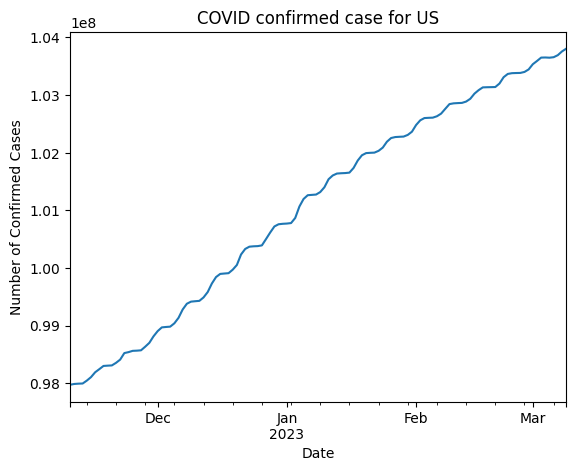

In [30]:
loaded_plot = content['example_plot']
loaded_plot.get_figure()

In [31]:
pickle.HIGHEST_PROTOCOL

5

# Recipe 2: Writing as CSV and other delimited files

In [32]:
import pandas as pd
from pathlib import Path
filepath = Path('../../datasets/Ch4/movieboxoffice.csv')

movies = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'Daily'],
                date_format="%d-%b-%y")
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Daily   128 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [33]:
movies.head()

,Daily
Date,
2021-04-26,"$125,789.89"
2021-04-27,"$99,374.01"
2021-04-28,"$82,203.16"
2021-04-29,"$33,530.26"
2021-04-30,"$30,105.24"


In [34]:
output = Path('../../datasets/Ch4/df_movies.csv')
movies.to_csv(output)

In [35]:
output = Path('../../datasets/Ch4/piped_df_movies.csv')
movies.to_csv(output, sep='|')

In [36]:
movies_df = pd.read_csv(output, sep='|')

In [37]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    128 non-null    object
 1   Daily   128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [38]:
pd.read_csv(output, sep='|', index_col=['Date'], parse_dates=['Date'])

,Daily
Date,
2021-04-26,"$125,789.89"
2021-04-27,"$99,374.01"
2021-04-28,"$82,203.16"
2021-04-29,"$33,530.26"
2021-04-30,"$30,105.24"
...,...
2021-08-27,$0.00
2021-08-28,$0.00
2021-08-29,$0.00


In [39]:
demo = pd.read_csv(filepath, usecols=['Date', 'DOW', 'Daily', 'To Date'])
demo.head(3).to_csv('tab_demo.csv', sep='\t', index=False)
demo.head(3).to_csv('comma_demo.csv', sep=',', index=False)
demo.head(3).to_csv('semicolon_demo.csv', sep=';', index=False)
demo.head(3).to_csv('pipe_demo.csv', sep='|', index=False)


### Special cases when using `.to_csv()`

In [40]:
import pandas as pd
person = pd.DataFrame({
     'name': ['Bond, James', 'Smith, James', 'Bacon, Kevin'],
     'location': ['Los Angeles, CA', 'Phoenix, AZ', 'New York, NY'],
     'net_worth': [10000, 9000, 8000]
    })

print(person)

           name         location  net_worth
0   Bond, James  Los Angeles, CA      10000
1  Smith, James      Phoenix, AZ       9000
2  Bacon, Kevin     New York, NY       8000


In [41]:
person.to_csv('person_a.csv', index=False)

In [42]:
pd.read_csv('person_a.csv')

,name,location,net_worth
0,"Bond, James","Los Angeles, CA",10000
1,"Smith, James","Phoenix, AZ",9000
2,"Bacon, Kevin","New York, NY",8000


In [43]:
import csv

person.to_csv('person_b.csv', 
               index=False, 
               quoting=csv.QUOTE_ALL)

person.to_csv('person_c.csv', 
               index=False, 
               quoting=csv.QUOTE_MINIMAL)

person.to_csv('person_d.csv', 
               index=False, 
               quoting= csv.QUOTE_NONNUMERIC)

person.to_csv('person_e.csv', 
               index=False, 
               quoting= csv.QUOTE_NONE, escapechar='\t')

# Recipe 3: Writing data to an Excel file

In the *Reading data from an Excel file* recipe in **Chapter 2**, *Reading Time Series Data from Files*, you were instructed to install `openpyxl` for the read engine. For this recipe, you will be using the same openpyxl for the write engine.  

* To install `openpyxl` using `conda`, run the following:

```
conda install openpyxl
```
* You can also use `pip`:

```
pip install openpyxl
```

In [87]:
#!pip install openpyxl -q

In [44]:
import openpyxl
# import xlsxwriter

In [45]:
print(openpyxl.__version__)
# print(xlsxwriter.__version__)

3.1.5


In [46]:
# Preparing for the recipe
import pandas as pd
from pathlib import Path

filepath = Path('../../datasets/Ch4/movieboxoffice.csv')

movies = pd.read_csv(filepath,
                 header=0,
                 parse_dates=[0],
                 index_col=0,
                 usecols=['Date',
                          'Daily'],
                date_format="%d-%b-%y")


In [47]:
output = \
Path('../../datasets/Ch4/daily_boxoffice.xlsx')

movies.to_excel(output,
               sheet_name='movies_data',
               engine='openpyxl', # default engine for xlsx files
               index=True)


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Daily   128 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [49]:
pd.read_excel(output).head()

,Date,Daily
0,2021-04-26,"$125,789.89"
1,2021-04-27,"$99,374.01"
2,2021-04-28,"$82,203.16"
3,2021-04-29,"$33,530.26"
4,2021-04-30,"$30,105.24"


In [ ]:

date_col = 'Date'
with pd.ExcelWriter(output,  
                    engine='openpyxl',
                    mode='a',
                    if_sheet_exists='replace') as writer:
    movies.to_excel(writer, sheet_name='movies_fixed_dates', index=True)
   
    worksheet = writer.sheets['movies_fixed_dates']

    for col in worksheet.iter_cols():
        header = col[0] # capture headers
        if header.value == date_col:
            for row in range(2, # skip first row
                             worksheet.max_row+1):
                    worksheet.cell(
                        row, 
                        header.column
                                  ).number_format='MM-DD-YYYY'

### Split the DataFrame into multiple sheets by Month

In [52]:
def sheet_date_format(sheet_name, writer, date_col):
    worksheet = writer.sheets[sheet_name]
    
    for col in worksheet.iter_cols():
        header = col[0] 
        if header.value == date_col:
            for row in range(2, worksheet.max_row+1):
                    worksheet.cell(
                        row, 
                        header.column).number_format='MM-DD-YYYY'

In [53]:
movies['Month'] = movies.index.month_name()

output = Path('../../datasets/Ch4/boxoffice_by_month.xlsx')
with pd.ExcelWriter(output,
                    engine='openpyxl') as writer:
    for month, data in movies.groupby('Month'):
        data.to_excel(writer, sheet_name=month)
        sheet_date_format(month, writer, date_col='Date')


# Recipe 4: Storing Data to a cloud storage
In this recipe, you will explore writing to AWS S3 using pandas and another approach using the AWS Python SDK. The pandas approach can be used to write files to other cloud storage locations, such as Azure or Google Cloud.

In the *Reading data from a URL* recipe in **Chapter 2**, *Reading Time Series Data from Files*, you were instructed to install boto3 and s3fs in order to read from AWS S3 buckets. In this recipe, you will be leveraging the same libraries.

* To install using pip, you can use this:

```
pip install boto3 s3fs
```

* To install using conda, you can use this:

```
conda install boto3 s3fs -y
```

In [160]:
# !pip install boto3 s3fs -q

In [ ]:
# !conda install -c conda-forge azure-storage-blob azure-identity -y

In [ ]:
# !conda install -c conda-forge adlfs gcsfs -y

In [ ]:
#!conda install boto3 s3fs google-cloud-storage gcsfs -y
# from google.cloud import storage
# storage_client = storage.Client(project=GCP_PROJECTID, credentials=GCP_API_KEY)
# bucket = storage_client.bucket('tscookbook')

In [54]:
import configparser
config = configparser.ConfigParser()
config.read('cloud.cfg')

AWS_ACCESS_KEY = config['AWS']['aws_access_key']
AWS_SECRET_KEY = config['AWS']['aws_secret_key']
AZURE_ACCOUNT_KEY = config['AZURE']['storage_account_key']
GCP_KEY_FILE = config['GCP']['key_file_path']


In [55]:
import pandas as pd
from pathlib import Path

source = "../../datasets/Ch4/boxoffice_by_month.xlsx"
movies = pd.concat(pd.read_excel(source,
             sheet_name=None,
             index_col='Date',
             parse_dates=True)).droplevel(0)

In [56]:
print(movies.head())

                    Daily  Month
Date                            
2021-04-26   $125,789.89   April
2021-04-27    $99,374.01   April
2021-04-28    $82,203.16   April
2021-04-29    $33,530.26   April
2021-04-30    $30,105.24   April


In [57]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Daily   128 non-null    object
 1   Month   128 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [332]:
# import pandas as pd
# from google.cloud import storage

# # Replace with the path to your service account key
# key_file_path = 'valiant-cycle-431419-h2-c5bc48019533.json'

# # Authenticate using the service account key
# storage_client = storage.Client.from_service_account_json(key_file_path)

# # Rest of your code to read the CSV
# bucket_name = 'tscookbook'
# file_path = 'my_movies.csv'

# blob = storage_client.bucket(bucket_name).blob(file_path)
# blob.download_to_filename('temp.csv')

# df = pd.read_csv('temp.csv')

# # Delete the temporary file
# import os
# os.remove('temp.csv')

In [59]:
# Writing to Amazon S3

movies.to_csv('s3://tscookbook-private/movies_s3.csv',
               storage_options={
                   'key': AWS_ACCESS_KEY,
                   'secret': AWS_SECRET_KEY
               })

movies.to_excel('s3://tscookbook-private/movies_s3.xlsx',
               storage_options={
                   'key': AWS_ACCESS_KEY,
                   'secret': AWS_SECRET_KEY
               })


In [183]:
# !pip install google-cloud-storage gcsfs -q

In [60]:
# Writing to Google Cloud Storage 

movies.to_csv('gs://tscookbook/movies_gs.csv',
               storage_options={'token': GCP_KEY_FILE})

movies.to_excel('gs://tscookbook/movies_gs.xlsx',
               storage_options={'token': GCP_KEY_FILE})


In [322]:
#!pip install adlfs azure-storage-blob azure-identity -q

In [338]:
# Writing to Azure Blob Storage 

movies.to_csv("abfs://objects@tscookbook.dfs.core.windows.net/movies_abfs.csv",
             storage_options={
                 'account_key': AZURE_ACCOUNT_KEY
             })

movies.to_csv("az://objects@tscookbook.dfs.core.windows.net/movies_az.csv",
             storage_options={
                 'account_key': AZURE_ACCOUNT_KEY
             })

movies.to_csv("az://objects/movies_az2.csv",
             storage_options={
                 'account_name': "tscookbook",
                 'account_key': AZURE_ACCOUNT_KEY
             })

## There is more
### Using `boto3`, `google.cloud`, and `azure.storage.blob`

In [61]:
# import boto3
# from io import StringIO

# bucket = "tscookbook-private"
# s3_client = boto3.resource("s3",
#             aws_access_key_id = AWS_ACCESS_KEY,
#             aws_secret_access_key = AWS_SECRET_KEY)

# with StringIO() as in_memory_buffer:
#     movies.to_csv(in_memory_buffer)
#     response = s3_client.Object(bucket, 'new_df.csv').put(Body=in_memory_buffer.getvalue())
#     status = response['ResponseMetadata']['HTTPStatusCode']
#     if status == 200:
#         print('Successful Write')
#     else:
#         print('Unsucessful Write - ', status)

data = movies.to_csv(encoding='utf-8', index=True)

In [62]:
import boto3

bucket = "tscookbook-private"

# Using the Resource API
s3_resource = boto3.resource("s3",
            aws_access_key_id = AWS_ACCESS_KEY,
            aws_secret_access_key = AWS_SECRET_KEY)

s3_resource.Object(bucket, 'movies_boto3_resourceapi.csv').put(Body=data)


{'ResponseMetadata': {'RequestId': 'ADWP3Q6RG2TV6H1K',
  'HostId': 'KRHPc4Rf2SZSrLCZOahnmLhCfwqKpKOj12mjkxC4s/OCVVQfd2P//qC1RsBEVhEuZB1yb4rVadz2o3waFBOxsD8P9NvLr7pi',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'KRHPc4Rf2SZSrLCZOahnmLhCfwqKpKOj12mjkxC4s/OCVVQfd2P//qC1RsBEVhEuZB1yb4rVadz2o3waFBOxsD8P9NvLr7pi',
   'x-amz-request-id': 'ADWP3Q6RG2TV6H1K',
   'date': 'Tue, 07 Oct 2025 16:11:16 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d2d50931a9beafa8102e3d987757931a"',
   'x-amz-checksum-crc32': 'HTl3PQ==',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"d2d50931a9beafa8102e3d987757931a"',
 'ChecksumCRC32': 'HTl3PQ==',
 'ChecksumType': 'FULL_OBJECT',
 'ServerSideEncryption': 'AES256'}

In [63]:
# Using the Client API
s3_client = boto3.client("s3",
            aws_access_key_id = AWS_ACCESS_KEY,
            aws_secret_access_key = AWS_SECRET_KEY)

s3_client.put_object(Body=data, Bucket=bucket, Key='movies_boto3_clientapi.csv')

{'ResponseMetadata': {'RequestId': 'BY4Q2VSGNA2JT88T',
  'HostId': 'DSAqs66WxrZTehkpMsB+e/jjjZ/WdNyA6/EySV/nJiZebbPsaAhcxNXuifCEd5fhaUFH++pS21E=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'DSAqs66WxrZTehkpMsB+e/jjjZ/WdNyA6/EySV/nJiZebbPsaAhcxNXuifCEd5fhaUFH++pS21E=',
   'x-amz-request-id': 'BY4Q2VSGNA2JT88T',
   'date': 'Tue, 07 Oct 2025 16:11:18 GMT',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"d2d50931a9beafa8102e3d987757931a"',
   'x-amz-checksum-crc32': 'HTl3PQ==',
   'x-amz-checksum-type': 'FULL_OBJECT',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 1},
 'ETag': '"d2d50931a9beafa8102e3d987757931a"',
 'ChecksumCRC32': 'HTl3PQ==',
 'ChecksumType': 'FULL_OBJECT',
 'ServerSideEncryption': 'AES256'}

In [64]:
from google.cloud import storage

# Authenticate using the service account key
storage_client = storage.Client.from_service_account_json(GCP_KEY_FILE)

bucket_name = 'tscookbook'
file_path = 'movies_gsapi.csv'

blob = storage_client.bucket(bucket_name).blob(file_path)

blob.upload_from_string(data)


In [65]:
type(storage_client)

google.cloud.storage.client.Client

In [ ]:
from azure.storage.blob import BlobServiceClient

blob_service_client = BlobServiceClient(
        account_url="https://tscookbook.blob.core.windows.net",
        credential=AZURE_ACCOUNT_KEY)

blob_client = blob_service_client.get_blob_client(
    container='objects',
    blob='movies_blobapi.csv')

blob_client.upload_blob(data)

# Recipe 5: Writing Large Datasets

In [1]:
# !conda install pytables -y
# ! conda install -c conda-forge fastavro -y

In [122]:
# !pip install pyarrow -q

In [67]:
import pandas as pd
from pathlib import Path

file_path = Path('../../datasets/Ch2/yellow_tripdata_2023-01.parquet')

In [68]:
df = pd.read_parquet(file_path, engine='pyarrow')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [70]:
import os
def size_in_mb(file):
    size_bytes = os.path.getsize(file)
    size_m = size_bytes / (1024**2)
    return round(size_m,2)

In [71]:
%%time
df.to_json('formats/yellow_tripdata.json', orient='records')
size_in_mb('formats/yellow_tripdata.json')

CPU times: user 4.89 s, sys: 934 ms, total: 5.82 s
Wall time: 6.12 s


1165.21

In [72]:
%%time
df.to_csv('formats/yellow_tripdata.csv', index=False)
size_in_mb('formats/yellow_tripdata.csv')

CPU times: user 17.3 s, sys: 1.05 s, total: 18.4 s
Wall time: 18.6 s


307.04

In [73]:
%%time
df.to_orc('formats/yellow_tripdata_uncompressed.orc', 
          engine_kwargs={'compression':'uncompressed'})
size_in_mb('formats/yellow_tripdata_uncompressed.orc')

CPU times: user 989 ms, sys: 86.9 ms, total: 1.08 s
Wall time: 1.64 s


319.94

In [74]:
%%time
df.to_orc('formats/yellow_tripdata_lz4.orc', 
          engine_kwargs={'compression':'lz4'})
size_in_mb('formats/yellow_tripdata_lz4.orc')

CPU times: user 963 ms, sys: 79.7 ms, total: 1.04 s
Wall time: 1.02 s


319.65

In [75]:
%%time
df.to_orc('formats/yellow_tripdata_zstd.orc', 
          engine_kwargs={'compression':'zstd'})
size_in_mb('formats/yellow_tripdata_zstd.orc')

CPU times: user 1.46 s, sys: 38.3 ms, total: 1.5 s
Wall time: 1.44 s


53.58

In [76]:
%%time
df.to_feather('formats/yellow_tripdata_uncompressed.feather', compression='uncompressed')
size_in_mb('formats/yellow_tripdata_uncompressed.feather')

CPU times: user 157 ms, sys: 78.2 ms, total: 235 ms
Wall time: 398 ms


435.84

In [77]:
%%time
df.to_feather('formats/yellow_tripdata_lz4.feather', compression='lz4')
size_in_mb('formats/yellow_tripdata_lz4.feather')

CPU times: user 606 ms, sys: 45.7 ms, total: 651 ms
Wall time: 215 ms


116.44

In [78]:
%%time
df.to_feather('formats/yellow_tripdata_zstd.feather', compression='zstd', compression_level=3)
size_in_mb('formats/yellow_tripdata_zstd.feather')

CPU times: user 942 ms, sys: 57.7 ms, total: 1e+03 ms
Wall time: 226 ms


61.79

In [79]:
%%time
df.to_parquet('formats/yellow_tripdata_snappy.parquet', 
              compression='snappy')
size_in_mb('formats/yellow_tripdata_snappy.parquet')

CPU times: user 863 ms, sys: 34.4 ms, total: 897 ms
Wall time: 869 ms


60.19

In [80]:
%%time
df.to_parquet('formats/yellow_tripdata_lz4.parquet', 
              compression='lz4')
size_in_mb('formats/yellow_tripdata_lz4.parquet')

CPU times: user 882 ms, sys: 32.6 ms, total: 915 ms
Wall time: 891 ms


59.91

In [81]:
%%time
df.to_parquet('formats/yellow_tripdata_zstd.parquet', 
              compression='zstd')
size_in_mb('formats/yellow_tripdata_zstd.parquet')

CPU times: user 914 ms, sys: 26.5 ms, total: 941 ms
Wall time: 862 ms


48.94

In [82]:
import glob
for filepath in glob.glob('formats/*'):
    print(os.path.splitext(filepath))

('formats/yellow_tripdata_zstd', '.orc')
('formats/yellow_tripdata_lz4', '.feather')
('formats/yellow_tripdata_zstd', '.feather')
('formats/yellow_tripdata_uncompressed', '.feather')
('formats/yellow_tripdata_snappy', '.parquet')
('formats/yellow_tripdata', '.json')
('formats/yellow_tripdata_uncompressed', '.orc')
('formats/yellow_tripdata', '.csv')
('formats/yellow_tripdata_zstd', '.parquet')
('formats/yellow_tripdata_lz4', '.parquet')
('formats/yellow_tripdata_lz4', '.orc')


In [83]:
import pandas as pd
import os
import glob
import time

def measure_read_performance(folder_path):

  performance_data = []
  for file_path in glob.glob(f'{folder_path}/*'):
    _, ext = os.path.splitext(file_path)
    start_time = time.time()
      
    if ext == '.csv':
      pd.read_csv(file_path, low_memory=False)
    elif ext == '.parquet':
      pd.read_parquet(file_path)
    elif ext == '.feather':
      pd.read_feather(file_path)
    elif ext == '.orc':
      pd.read_orc(file_path)
    elif ext == '.json':
      pd.read_json(file_path)

    end_time = time.time()
    performance_data.append({'filename': file_path, 
                             'read_time': end_time - start_time})

    df = pd.DataFrame(performance_data)

  return df.sort_values('read_time').reset_index(drop=True)

In [84]:
results =\
    measure_read_performance(folder_path='formats')

In [85]:
print(results)

                                        filename  read_time
0            formats/yellow_tripdata_lz4.parquet   0.081186
1           formats/yellow_tripdata_zstd.parquet   0.093822
2           formats/yellow_tripdata_zstd.feather   0.128886
3         formats/yellow_tripdata_snappy.parquet   0.153751
4            formats/yellow_tripdata_lz4.feather   0.159049
5   formats/yellow_tripdata_uncompressed.feather   0.244457
6               formats/yellow_tripdata_zstd.orc   0.593295
7       formats/yellow_tripdata_uncompressed.orc   0.640873
8                formats/yellow_tripdata_lz4.orc   0.675962
9                    formats/yellow_tripdata.csv   4.439617
10                  formats/yellow_tripdata.json  18.699698
